# Importation des librairies nécessaires

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Question 1 : Exportation des données

In [74]:
df = pd.read_excel('Capital.xls')

In [75]:
df.head()

,X,Y,Z
0,Aix en provence,18.94,Sud-Est
1,Ajaccio,22.06,Sud-Est
2,Amiens,17.97,Nord
3,Angers,18.86,Ouest
4,Annecy,14.97,Sud-Est


# Question 2: Représentation graphique en histogramme

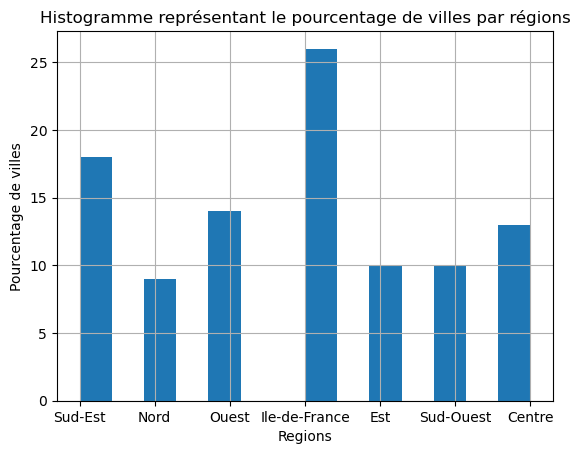

In [76]:
hist = df['Z'].hist(bins=14, weights=(np.ones(len(df)) / len(df))*100)
# Ajout du titre et des étiquettes
plt.xlabel('Regions')
plt.ylabel('Pourcentage de villes')
plt.title('Histogramme représentant le pourcentage de villes par régions')
plt.show()

# Question 3: Répartition de chaque région

# Manière 1

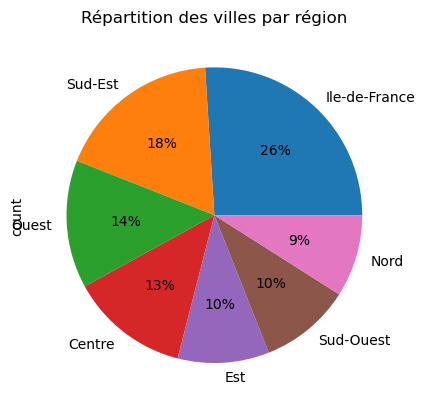

In [77]:
pie = df['Z'].value_counts().plot.pie(autopct=lambda p: '{:.0f}%'.format(p * len(df) / 100))
plt.title('Répartition des villes par région')
plt.show()

# Manière 2

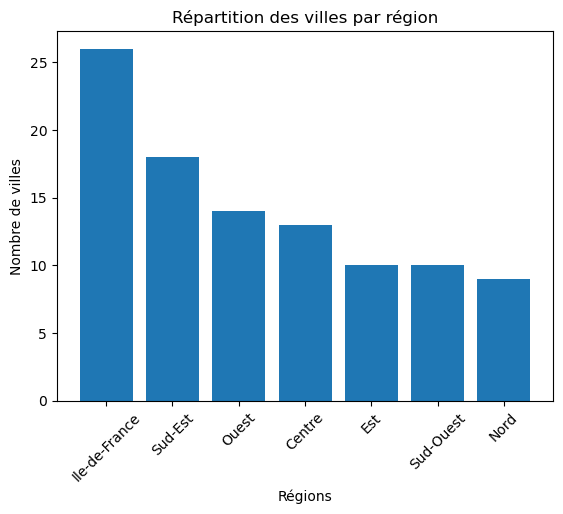

In [78]:
# Calcul des valeurs pour chaque région
region_counts = df['Z'].value_counts()

# Création d'un graphique à barres
plt.bar(region_counts.index, region_counts)

# Ajout du titre et des étiquettes
plt.xlabel('Régions')
plt.ylabel('Nombre de villes')
plt.title('Répartition des villes par région')

# Affichage du graphique
plt.xticks(rotation=45)
plt.show()

# Question 4

La région la plus représentée dans cette étude est l'Ile-De-France comme le montre les deux schémas de la question précédente. On peut aussi faire un compteur de régions, comme suit, pour s'assurer.

In [79]:
print(df['Z'].value_counts())

Z
Ile-de-France    26
Sud-Est          18
Ouest            14
Centre           13
Est              10
Sud-Ouest        10
Nord              9
Name: count, dtype: int64


# Question 5: Statistiques par région

In [86]:
# On regroupe les données par région en calculant les statistiques
statistiques_par_region = df.groupby('Z')['Y'].agg(['mean', 'median', 'min', 'max', 'std'])

# On renomme les colonnes
statistiques_par_region.columns = ['Moyenne', 'Médiane', 'Minimum', 'Maximum', 'Écart-type']

print(statistiques_par_region)

                 Moyenne  Médiane  Minimum  Maximum  Écart-type
Z                                                              
Centre         18.115385   17.370    15.77    21.55    1.906881
Est            17.662000   16.975    14.98    22.04    2.095200
Ile-de-France  11.764615   11.285     3.68    19.32    3.879327
Nord           25.951111   27.970    15.37    36.17    7.099798
Ouest          18.896429   18.265    14.00    25.99    3.098314
Sud-Est        19.769444   19.575    14.30    25.98    2.938534
Sud-Ouest      20.511000   21.010    12.72    30.23    4.549406


# Question 6: Remarque par rapport aux résultats

In [87]:
stats = df.groupby(['Z']).describe()
stats

Y                                                        \
              count       mean       std    min      25%     50%      75%   
Z                                                                           
Centre         13.0  18.115385  1.906881  15.77  17.0700  17.370  19.1900   
Est            10.0  17.662000  2.095200  14.98  16.3875  16.975  18.1850   
Ile-de-France  26.0  11.764615  3.879327   3.68   9.2425  11.285  14.7375   
Nord            9.0  25.951111  7.099798  15.37  20.4600  27.970  29.9600   
Ouest          14.0  18.896429  3.098314  14.00  16.6875  18.265  21.0900   
Sud-Est        18.0  19.769444  2.938534  14.30  18.7675  19.575  21.4225   
Sud-Ouest      10.0  20.511000  4.549406  12.72  19.2700  21.010  21.9325   

                      
                 max  
Z                     
Centre         21.55  
Est            22.04  
Ile-de-France  19.32  
Nord           36.17  
Ouest          25.99  
Sud-Est        25.98  
Sud-Ouest      30.23

On remarque que si on souhaite éviter les taux de taxe élevés, on pourrait considérer le minimum. Dans ce cas, la région la plus intéressante serait 'Ile-de-France' avec un taux minimum de 3.68 et une moyenne de 11.76

# Question 7: Région la plus représentative de la moyenne nationale

In [88]:
# On calcule la moyenne nationale
moyenne_nationale = statistiques_par_region['Moyenne'].mean()

# On calcule la différence entre la moyenne nationale et la moyenne de chacune des régions
difference_moyenne = abs(statistiques_par_region['Moyenne'] - moyenne_nationale)

# On extrait la région avec la différence moyenne la plus faible, c'est à dire la plus proche de la moyenne nationale
region_la_plus_representative = difference_moyenne.idxmin()

print("La région la plus représentative de la moyenne nationale est :", region_la_plus_representative)


La région la plus représentative de la moyenne nationale est : Ouest


# Question 8:

In [89]:
# On divise les villes en trois groupes
groupes = pd.qcut(df['Y'], q=[0, 1/3, 2/3, 1], labels=['Petit', 'Moyen', 'Grand'])

# On ajoute les groupes à notre dataframe
df['groupe_taxe'] = groupes

# On affiche les villes dans chaque groupe
for groupe, villes in df.groupby('groupe_taxe')['X']:
    print(f"=> Groupe {groupe}: {villes.tolist()}")


=> Groupe Petit: ['Annecy', 'Antibes', 'Antony', 'Asnières-sur-Seine', 'Aubervilliers', 'Aulnay-sous-Bois', 'Beauvais', 'Belfort', 'Boulogne-Billancourt', 'Bourges', 'Brive-la-Gaillarde', 'Caen', 'Champigny/Marne', 'Cholet', 'Clermont-Ferrand', 'Colombes', 'Courbevoie', 'Drancy', 'Fontenay-sous-Bois', 'Ivry-sur-Seine', 'Maisons-Alfort', 'Montauban', 'Montreuil', 'Nanterre', 'Neuilly-sur-Seine', 'Paris', 'Perpignan', 'Reims', 'Rueil-Malmaison', 'Saint-Denis', 'St-Maur-des-Fossés', 'Sartrouville', 'Versailles', 'Vitry-sur-Seine']
=> Groupe Moyen: ['Aix en provence', 'Amiens', 'Angers', 'Argenteuil', 'Blois', 'Chalon-sur-Saone', 'Chambéry', 'Charleville-Mézières', 'Chateauroux', 'Colmar', 'Créteil', 'Dijon', 'Grenoble', 'La Rochelle', 'Le Havre', 'Le Mans', 'Limoges', 'Lorient', 'Lyon', 'Mérignac', 'Metz', 'Mulhouse', 'Nancy', 'Niort', 'Noisy-le-Grand', 'Quimper', 'Saint-Nazaire', 'Sarcelles', 'Toulon', 'Toulouse', 'Troyes', 'Valence', 'Vénissieux']
=> Groupe Grand: ['Ajaccio', 'Arles', '

# Question 9: Villes à 30% au dessus ou en dessous de la moyenne

In [90]:
def villes_concernees(df, pourcentage):
    # On calcule la moyenne du taux de taxe d'habitation
    moyenne_taxe = df['Y'].mean()

    # On définit les limites supérieure et inférieure de 30% au-dessus et en dessous de la moyenne
    limite_superieure = moyenne_taxe * (1 + pourcentage / 100)
    limite_inferieure = moyenne_taxe * (1 - pourcentage / 100)

    # On sélectionne les villes qui ont un taux de tax entre les limites voulues
    villes_concernees = df[(df['Y'] > limite_superieure) | (df['Y'] < limite_inferieure)]

    return villes_concernees


pourcentage = 30
villes_concernees_df = villes_concernees(df, pourcentage)

print(f"Les villes avec un taux de taxe d'habitation situé à {pourcentage}% au-dessus ou en dessous de la moyenne :")
print(villes_concernees_df[['X', 'Y']])


Les villes avec un taux de taxe d'habitation situé à 30% au-dessus ou en dessous de la moyenne :
                       X      Y
6                 Antony  11.07
8                  Arles  24.49
9     Asnières-sur-Seine  10.13
19  Boulogne-Billancourt   9.46
21                 Brest  25.99
24                Calais  23.36
35            Courbevoie   4.86
38                Drancy  10.42
39             Dunkerque  28.69
41    Fontenay-sous-Bois  12.10
43        Ivry-sur-Seine   9.16
45      La Seyne-sur-Mer  25.98
49                 Lille  36.17
53        Maisons-Alfort  10.30
62              Nanterre   6.13
64     Neuilly-sur-Seine   3.68
66                 Nimes  30.23
70                 Paris   9.15
78               Roubaix  27.97
81           Saint-Denis   9.17
83    St-Maur-des-Fossés  10.82
87          Sartrouville  12.38
91             Tourcoing  33.61
96            Versailles   8.95
97      Villeneuve-d'Asq  29.96
99       Vitry-sur-Seine  11.50


# Question 10: Villes à 20% au dessus ou en dessous de la moyenne

On va utiliser la fonction précédente

In [91]:
pourcentage = 20
villes_concernees_df = villes_concernees(df, pourcentage)

print(f"Les villes avec un taux de taxe d'habitation situé à {pourcentage}% au-dessus ou en dessous de la moyenne :")
print(villes_concernees_df[['X', 'Y']])

Les villes avec un taux de taxe d'habitation situé à 20% au-dessus ou en dessous de la moyenne :
                       X      Y
1                Ajaccio  22.06
6                 Antony  11.07
8                  Arles  24.49
9     Asnières-sur-Seine  10.13
10         Aubervilliers  12.45
12               Avignon  22.41
16               Béziers  22.14
18              Bordeaux  22.11
19  Boulogne-Billancourt   9.46
21                 Brest  25.99
24                Calais  23.36
31                Cholet  14.00
34              Colombes  14.16
35            Courbevoie   4.86
38                Drancy  10.42
39             Dunkerque  28.69
41    Fontenay-sous-Bois  12.10
43        Ivry-sur-Seine   9.16
45      La Seyne-sur-Mer  25.98
49                 Lille  36.17
53        Maisons-Alfort  10.30
54             Marseille  21.93
57             Montauban  12.72
58           Montpellier  21.40
59             Montreuil  13.67
62              Nanterre   6.13
64     Neuilly-sur-Seine   3.68
66     